## imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')
import numpy as np
import collections
from datetime import datetime

## mapping top 10 scams through time

opens throughtout time file and offline dates and reads the format then maps to matplotlib

plots offline dates to scam 5622's spike to try to get some sort of correlation

Text(0, 0.5, 'cumulative amount')

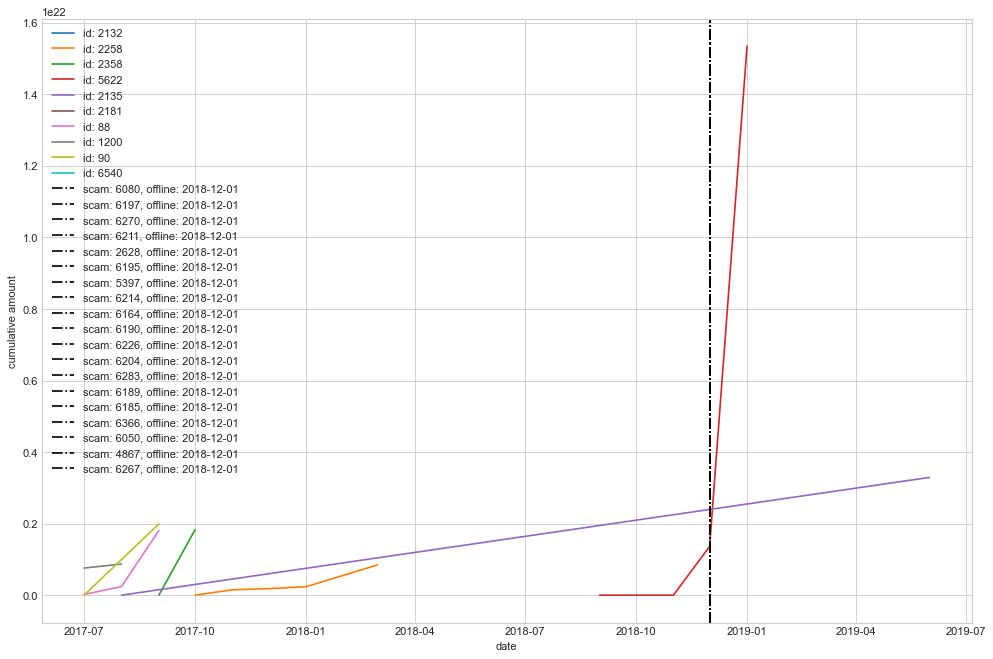

In [2]:
file = open('out/ScamsOverTimeOut.csv','r')
offlineFile = open('out/offlineDates.tsv','r')
figure(figsize = (15,10), dpi = 80)

allTimes = []

items = collections.defaultdict(list)
verticals = collections.defaultdict(list)

for line in file.readlines():
    #print(line)
    values = line.split(", ")
    idAndDateandValue = values[0].split(" ") + [str(int(values[1].strip("\\\n")))]
    #print(idAndDateandValue)
    items[idAndDateandValue[0]].append((idAndDateandValue[1], idAndDateandValue[2]))
    
for line in offlineFile.readlines():
    values = line.split("\t")
    secondVals = values[1].replace("[","").replace("]","").replace("\"","").strip("\\\n").split(", ")
    idAndDateData = [values[0].replace("\"","")] + secondVals
    #print(idAndDateData)
    verticals[idAndDateData[0]].append((idAndDateData[1],idAndDateData[2]))
    
for key,val in items.items():
    y = [int(dateScam[1]) for dateScam in val]
    x = [datetime.strptime(dateScam[0], '%m/%Y') for dateScam in val]
    
    #specifying only dates around scam 5622 
    for itm in x:
        if key == "5622":
            allTimes.append(itm)
    
    x.sort()
    y.sort()
    plt.plot(x, y, label = f'id: {key}')
    
for key,val in verticals.items():
    count = 0
    for itm in val:
        #specifying only 1 item of key can appear on graph + only dates in december
        if ((datetime.strptime(itm[1],'%Y-%m-%d') in allTimes) and (count == 0)
            and (datetime.strptime(itm[1],'%Y-%m-%d').month == 12)):
            plt.axvline(x=datetime.strptime(itm[1],'%Y-%m-%d'), color='k', linestyle='-.', label= f'scam: {key}, offline: {itm[1]}')
            count+=1
    
plt.legend()
plt.xlabel("date")
plt.ylabel("cumulative amount")